# MAP Classifier

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Conditional independence  
functions:

In [5]:
X = {0: 0.3, 1: 0.7}  # P(X=x)
Y = {0: 0.3, 1: 0.7}  # P(Y=y)
C = {0: 0.5, 1: 0.5}  # P(C=c)

X_Y = {
    (0, 0): 0.2,
    (0, 1): 0.1,
    (1, 0): 0.1,
    (1, 1): 0.6
}  # P(X=x, Y=y)

X_C = {
    (0, 0): 0.2,
    (0, 1): 0.1,
    (1, 0): 0.3,
    (1, 1): 0.4
}  # P(X=x, C=y)

Y_C = {
    (0, 0): 0.2,
    (0, 1): 0.1,
    (1, 0): 0.3,
    (1, 1): 0.4
}  # P(Y=y, C=c)

X_Y_C = {
    (0, 0, 0): 0.08,
    (0, 0, 1): 0.02,
    (0, 1, 0): 0.12,
    (0, 1, 1): 0.08,
    (1, 0, 0): 0.12,
    (1, 0, 1): 0.08,
    (1, 1, 0): 0.18,
    (1, 1, 1): 0.32,
}  # P(X=x, Y=y, C=c)

In [6]:
def is_X_Y_depndendent(X, Y, X_Y):
    """
    return True iff X and Y are dependant
    """
    newXY = {}
    
    for i in range(len(X)):
        for j in range(len(Y)):
            newXY[(i,j)] = (X[i]*Y[j])
    
    keys = newXY.keys()
    compa = np.array([newXY[key] for key in keys])
    compb = np.array([X_Y[key] for key in keys])
    return not np.allclose(compa,compb)

def is_X_Y_given_C_independent(X, Y, C, X_C, Y_C, X_Y_C):
    """
    return True iff X_given_C and Y_given_C are independant
    """
    xygc = np.ones(1)
    xgcygc = np.ones(1)
    for key in X_Y_C:
            xygc = np.append(xygc, X_Y_C[key]/C[key[2]])
            xgcygc = np.append(xgcygc, (X_C[key[0],key[2]]/C[key[2]]) * (Y_C[key[1],key[2]]/C[key[2]]))
    xygc = np.delete(xygc,0,0)
    xgcygc = np.delete(xgcygc,0,0)
                
    return np.allclose(xygc, xgcygc)

In [7]:
print(is_X_Y_depndendent(X,Y,X_Y))
print(is_X_Y_given_C_independent(X, Y, C, X_C, Y_C, X_Y_C))

True
True


# Maximum Likelihood estimation  
 
$X$~$Pois(\lambda)$  
$p(X=k|\lambda) = \frac{\lambda^ke^{-\lambda}}{k!}$  
$X$ is a RV $\lambda$ is the rate and $p$ is the pmf


In [8]:
def poisson_log_pmf(k, rate):
    """
    k: A discrete instance
    rate: poisson rate parameter (lambda)

    return the log pmf value for instance k given the rate
    """
    final_sum = 0
    for val in k:
        r_p_val = rate ** val
        e_p_negr = np.e ** (-1*rate)
        val_fact = np.math.factorial(val)
        final_add = (r_p_val * e_p_negr) / val_fact
        final_sum += np.log(final_add)
    return final_sum


In the file poisson_1000_samples.csv there are 1000 points drawn from some poisson distribution with a fixed paramter $\lambda$  


In [9]:
poisson_samples = pd.read_csv('data/poisson_1000_samples.csv').values.flatten()
rates = np.linspace(1e-20, 20, num=1000)

In [10]:
def get_poisson_log_likelihoods(samples, rates):
    """
    samples: set of univariate discrete observations
    rates: an iterable of rates to calculate log-likelihood by.

    return: 1d numpy array, where each value represent that log-likelihood value of rates[i]
    """
    # TODO: implement
    ret_arr = np.ones(1)
    for r in rates:
        ret_arr = np.append(ret_arr, poisson_log_pmf(samples, r))
    ret_arr = np.delete(ret_arr,0,0)
    return ret_arr

def possion_iterative_mle(samples, rates):
    """
    samples: set of univariate discrete observations
    rate: a rate to calculate log-likelihood by.

    return: the rate that maximizes the likelihood 
    """
    rate = 0.
    likelihoods = get_poisson_log_likelihoods(samples, rates)
    best_val = -2000000000
    i = 0 
    for l in likelihoods:
        if l > best_val:
            best_val = l
            rate = rates[i]
        i += 1

    return rate

def possion_analytic_mle(samples):
    """
    samples: set of univariate discrete observations

    return: the rate that maximizes the likelihood
    """
    return (1/len(samples)) * sum(samples)
    
    

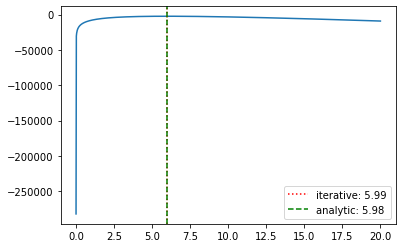

In [11]:
x = rates
y = get_poisson_log_likelihoods(poisson_samples, rates)

iterative_rate = possion_iterative_mle(poisson_samples, rates)
analytic_rate = possion_analytic_mle(poisson_samples)

plt.plot(x, y)
plt.axvline(x=iterative_rate, linestyle=':', c='r', label=f"iterative: {iterative_rate:.2f}")
plt.axvline(x=analytic_rate, linestyle='--', c='g', label=f"analytic: {analytic_rate:.2f}")
plt.legend()
plt.show()


# Normal Naive Bayes Classifier Vs Normal Full Bayes Classifier


### Data

The dataset contains 2 features (**Temperature**, **Humidity**) alongside a binary label (**Spotted**) for each instance.<br>

We are going to test 2 different classifiers :
* Naive Bayes Classifier
* Full Bayes Classifier

we are going to assume normal distributions

The datafiles are :
- randomammal_train.csv
- randomammal_test.csv

In [29]:
# The columns order: ['Temp', 'Humidity', 'Spotted']
train_set = pd.read_csv('data/randomammal_train.csv').values
test_set = pd.read_csv('data/randomammal_test.csv').values

# Data Visualization

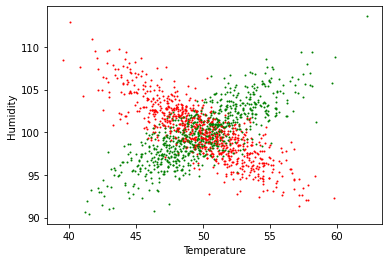

In [31]:
i = 0
for ins in train_set:
    if ins[-1] == 1:
        plt.plot(ins[0], ins[1], 'go', ms=1)
    else:
        plt.plot(ins[0], ins[1], 'ro', ms=1)
    i += 1
plt.ylabel('Humidity')
plt.xlabel('Temperature')
plt.show()

## Naive Model

In [32]:
def normal_pdf(x, mean, std):
    """
    Calculate normal desnity function for a given x, mean and standrad deviation.
 
    Input:
    - x: A value we want to compute the distribution for.
    - mean: The mean value of the distribution.
    - std:  The standard deviation of the distribution.
 
    Returns the normal distribution pdf according to the given mean and std for the given x.    
    """
    root = np.sqrt(2 * np.pi * (std**2))
    pos_exp = ((x - mean)**2) / (2 * (std**2))
    e_exp = np.e**(-1 * pos_exp)
    return (1 / root) * e_exp

**NaiveNormalClassDistribution**

In [33]:
class NaiveNormalClassDistribution():
    def __init__(self, dataset, class_value):
        """
        A class which encapsulates the relevant parameters(mean, std) for a class conditinoal normal distribution.
        The mean and std are computed from a given data set.
        
        Input
        - dataset: The dataset as a 2d numpy array, assuming the class label is the last column
        - class_value : The class to calculate the parameters for.
        """
        self.class_value = class_value
        self.data = dataset
        
        class_data = np.ones(self.data.shape[1])
        self.mean_vector = np.ones(1)
        self.std_vector = np.ones(1)
        
        for ins in dataset:
            if ins[-1] == class_value:
                class_data = np.vstack((class_data,ins))
        class_data = np.delete(class_data,0,0)
        
        for i in range(class_data.shape[1] - 1):
            self.mean_vector = np.vstack((self.mean_vector, np.mean(class_data.T[i])))
            self.std_vector = np.vstack((self.std_vector, np.std(class_data.T[i])))
        
        self.mean_vector = np.delete(self.mean_vector,0,0)
        self.std_vector = np.delete(self.std_vector,0,0)

        self.class_size = class_data.shape[0]
    
    def get_prior(self):
        """
        Returns the prior porbability of the class according to the dataset distribution.
        """
        return (self.class_size / self.data.shape[0])
    
    def get_instance_likelihood(self, x):
        """
        Returns the likelihhod porbability of the instance under the class according to the dataset distribution.
        """        
        ret_val = 1
        for i in range(len(x) - 1):
            ret_val *= normal_pdf(x[i], self.mean_vector[i],self.std_vector[i])

        return ret_val
    
    def get_instance_posterior(self, x):
        """
        Returns the posterior porbability of the instance under the class according to the dataset distribution.
        * Ignoring p(x)
        """
        likelihood = self.get_instance_likelihood(x)
        prior = self.class_size / self.data.shape[0]
        
        return prior * likelihood

In [34]:
# Build NaiveNormalClassDistribution for each class.
naive_normal_CD_0 = NaiveNormalClassDistribution(train_set, 0)
naive_normal_CD_1 = NaiveNormalClassDistribution(train_set, 1)

**MAPClassifier**, build a MAPClassifier object containing the 2 distribution objects above

In [35]:
class MAPClassifier():
    def __init__(self, ccd0 , ccd1):
        """
        A Maximum a posteriori classifier. 
        This class will hold 2 class distributions, one for class 0 and one for class 1, and will predict an instance
        by the class that outputs the highest posterior probability for the given instance.
    
        Input
            - ccd0 : An object contating the relevant parameters and methods for the distribution of class 0.
            - ccd1 : An object contating the relevant parameters and methods for the distribution of class 1.
        """
        self.dist0 = ccd0
        self.dist1 = ccd1
    
    def predict(self, x):
        """
        Predicts the instance class using the 2 distribution objects given in the object constructor.
    
        Input
            - An instance to predict.
        Output
            - 0 if the posterior probability of class 0 is higher and 1 otherwise.
        """
        pre0 = self.dist0.get_instance_posterior(x)
        pre1 = self.dist1.get_instance_posterior(x)
        if pre0 >= pre1:
            return 0
        else:
            return 1
        

In [36]:
naive_normal_classifier = MAPClassifier(naive_normal_CD_0, naive_normal_CD_1)

### Evaluate model
**compute_accuracy**

In [37]:
def compute_accuracy(testset, map_classifier):
    """
    Compute the accuracy of a given a testset using a MAP classifier object.
    
    Input
        - testset: The testset for which to compute the accuracy (Numpy array). where the class label is the last column
        - map_classifier : A MAPClassifier object capable of prediciting the class for each instance in the testset.
        
    Ouput
        - Accuracy = #Correctly Classified / #testset size
    """
    correctly_classified = 0
    for ins in testset:
        if map_classifier.predict(ins) == ins[-1]:
            correctly_classified += 1
    return correctly_classified / testset.shape[0]

In [38]:
naive_accuracy = compute_accuracy(test_set, naive_normal_classifier)
naive_accuracy

0.495

## Full Model

In [39]:
def multi_normal_pdf(x, mean, cov):
    """
    Calculate multi variable normal desnity function for a given x, mean and covarince matrix.
 
    Input:
    - x: A value we want to compute the distribution for.
    - mean: The mean vector of the distribution.
    - cov:  The covariance matrix of the distribution.
 
    Returns the normal distribution pdf according to the given mean and var for the given x.    
    """
    x = np.delete(x,-1)
    left_side = (np.pi * 2)**(-1 * len(x) / 2) * ((np.linalg.det(cov))**(-0.5))
    right_side = np.e**(-0.5 * (x - mean).T.dot(np.linalg.inv(cov).dot((x - mean))))
    return left_side * right_side

**MultiNormalClassDistribution**, build a distribution object for each class.

In [40]:
class MultiNormalClassDistribution():
    def __init__(self, dataset, class_value):
        """
        A class which encapsulate the relevant parameters(mean, cov matrix) for a class conditinoal multi normal distribution.
        The mean and cov matrix (You can use np.cov for this!) will be computed from a given data set.
        
        Input
        - dataset: The dataset as a numpy array
        - class_value : The class to calculate the parameters for.
        """
        self.data = dataset
        
        self.class_value = class_value
        
        class_data = np.ones(self.data.shape[1])
        for ins in dataset:
            if ins[-1] == class_value:
                class_data = np.vstack((class_data,ins))
        class_data = np.delete(class_data,0,0)
        
        self.mean_vector = []
        for i in range(class_data.shape[1] - 1):
            self.mean_vector.append(np.mean(class_data.T[i]))
        
        self.class_size = class_data.shape[0]
        
        self.cov_matrix = np.cov(class_data.T[0], class_data.T[1])
        
        pass
        
    def get_prior(self):
        """
        Returns the prior porbability of the class according to the dataset distribution.
        """
        return (self.class_size / self.data.shape[0])
    
    def get_instance_likelihood(self, x):
        """
        Returns the likelihood of the instance under the class according to the dataset distribution.
        """
        return multi_normal_pdf(x, self.mean_vector,self.cov_matrix)
            
    def get_instance_posterior(self, x):
        """
        Returns the posterior porbability of the instance under the class according to the dataset distribution.
        * Ignoring p(x)
        """
        likelihood = self.get_instance_likelihood(x)
        prior = self.class_size / self.data.shape[0]
        
        return prior * likelihood

In [41]:
# Build the a MultiNormalClassDistribution for each class.
multi_normal_CD_0 = MultiNormalClassDistribution(train_set, 0)
multi_normal_CD_1 = MultiNormalClassDistribution(train_set, 1)

build a MAPClassifier object contating the 2 distribution objects above.

In [42]:
multi_normal_classifier = MAPClassifier(multi_normal_CD_0, multi_normal_CD_1)

### Evaluate model
Compute accuracy on test set.

In [43]:
# Compute the naive model accuracy and store it in the naive accuracy variable.
full_accuracy = compute_accuracy(test_set, multi_normal_classifier)
full_accuracy

0.7975

## Results

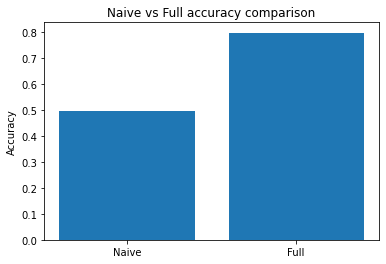

In [44]:
plt.bar(x=['Naive', 'Full'], height=[naive_accuracy, full_accuracy])
plt.title("Naive vs Full accuracy comparison")
plt.ylabel("Accuracy")
plt.show()

# Comparing Max a posteriori, prior, and likelihood results

In [45]:
class MaxPrior():
    def __init__(self, ccd0 , ccd1):
        """
        A Maximum prior classifier. 
        This class will hold 2 class distributions, one for class 0 and one for class 1, and will predicit an instance
        by the class that outputs the highest prior probability for the given instance.
    
        Input
            - ccd0 : An object contating the relevant parameters and methods for the distribution of class 0.
            - ccd1 : An object contating the relevant parameters and methods for the distribution of class 1.
        """
        self.dist0 = ccd0
        self.dist1 = ccd1
        pass
    
    def predict(self, x):
        """
        Predicts the instance class using the 2 distribution objects given in the object constructor.
    
        Input
            - An instance to predict.
        Output
            - 0 if the posterior probability of class 0 is higher and 1 otherwise.
        """
        pre0 = self.dist0.get_prior()
        pre1 = self.dist1.get_prior()
        if pre0 >= pre1:
            return 0
        else:
            return 1
        pass


In [46]:
class MaxLikelihood():
    def __init__(self, ccd0 , ccd1):
        """
        A Maximum Likelihood classifier. 
        This class will hold 2 class distributions, one for class 0 and one for class 1, and will predicit an instance
        by the class that outputs the highest likelihood probability for the given instance.
    
        Input
            - ccd0 : An object contating the relevant parameters and methods for the distribution of class 0.
            - ccd1 : An object contating the relevant parameters and methods for the distribution of class 1.
        """
        self.dist0 = ccd0
        self.dist1 = ccd1
        pass
    
    def predict(self, x):
        """
        Predicts the instance class using the 2 distribution objects given in the object constructor.
    
        Input
            - An instance to predict.
        Output
            - 0 if the posterior probability of class 0 is higher and 1 otherwise.
        """
        pre0 = self.dist0.get_instance_likelihood(x)
        pre1 = self.dist1.get_instance_likelihood(x)
        if pre0 >= pre1:
            return 0
        else:
            return 1
        pass

### Run and evaluate the models

accuracy of test_set using MaxPrior, NaiveNormal : 0.49
accuracy of test_set using MaxPrior, multiNormal : 0.49
accuracy of test _set using MaxLikelihood, NaiveNormal : 0.4975
accuracy of test_set using MaxLikelihood, multiNormal : 0.795
accuracy of test_set using MAP, NaiveNormal : 0.495
accuracy of test_set using MAP, multiNormal : 0.7975


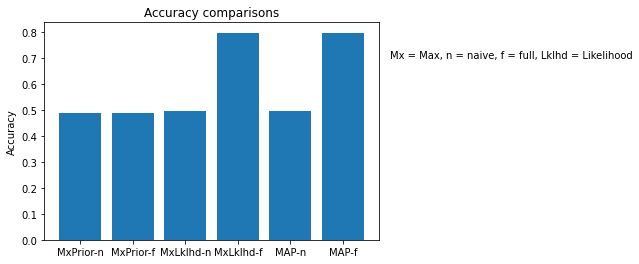

In [47]:
maxPrior_naive_acc = compute_accuracy(test_set, MaxPrior(naive_normal_CD_0, naive_normal_CD_1))
maxPrior_full_acc = compute_accuracy(test_set, MaxPrior(multi_normal_CD_0, multi_normal_CD_1))
maxLikelihood_naive_acc = compute_accuracy(test_set, MaxLikelihood(naive_normal_CD_0, naive_normal_CD_1))
maxLikelihood_full_acc = compute_accuracy(test_set, MaxLikelihood(multi_normal_CD_0, multi_normal_CD_1))
MAP_naive_acc = compute_accuracy(test_set, MAPClassifier(naive_normal_CD_0, naive_normal_CD_1))
MAP_full_acc = compute_accuracy(test_set, MAPClassifier(multi_normal_CD_0, multi_normal_CD_1))

print(f"accuracy of test_set using MaxPrior, NaiveNormal : {maxPrior_naive_acc}")
print(f"accuracy of test_set using MaxPrior, multiNormal : {maxPrior_full_acc}")
print(f"accuracy of test _set using MaxLikelihood, NaiveNormal : {maxLikelihood_naive_acc}")
print(f"accuracy of test_set using MaxLikelihood, multiNormal : {maxLikelihood_full_acc}")
print(f"accuracy of test_set using MAP, NaiveNormal : {MAP_naive_acc}")
print(f"accuracy of test_set using MAP, multiNormal : {MAP_full_acc}")

plt.bar(x=['MxPrior-n','MxPrior-f','MxLklhd-n','MxLklhd-f','MAP-n','MAP-f'], height=[maxPrior_naive_acc, maxPrior_full_acc, maxLikelihood_naive_acc, maxLikelihood_full_acc, MAP_naive_acc, MAP_full_acc])
plt.title("Accuracy comparisons")
plt.ylabel("Accuracy")
plt.text(5.9,0.7,"Mx = Max, n = naive, f = full, Lklhd = Likelihood")
plt.show()

# Discrete Naive Bayes Classifier 

**Laplace** smoothing will be used.

$$ P(x_j | A_i) = \frac{n_{ij} + 1}{n_i + |V_j|} $$
Where:
* $n_{ij}$ The number of training instances with the class $A_i$ and the value $x_j$ in the relevant attribute.
* $n_i$ The number of training instances with the class $A_i$
* $|V_j|$ The number of possible values of the relevant attribute.

## Data
We will try to predict breast cancer again only this time from a different dataset, 
<br> you can read about the dataset here : [Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer)<br>
 - breast_trainset.csv
 - breast_testset.csv
 

In [48]:
# Load the train and test set into a pandas dataframe and convert them into a numpy array.
train_set = pd.read_csv('data/breast_trainset.csv').values
test_set = pd.read_csv('data/breast_testset.csv').values

## Discrete Naive Bayes Distribution for each class

In [49]:
EPSILLON = 1e-6 # if a certain value only occurs in the test set, the probability for that value will be EPSILLON.

class DiscreteNBClassDistribution():
    def __init__(self, dataset, class_value):
        """
        A class which computes and encapsulate the relevant probabilites for a discrete naive bayes 
        distribution for a specific class. The probabilites are computed with laplace smoothing.
        
        Input
        - dataset: The dataset as a numpy array.
        - class_value: Compute the relevant parameters only for instances from the given class.
        """
        self.data = dataset
        
        self.class_value = class_value
        
        self.class_data = np.ones(self.data.shape[1])
        for ins in dataset:
            if ins[-1] == class_value:
                self.class_data = np.vstack((self.class_data,ins))
        self.class_data = np.delete(self.class_data,0,0)
        self.class_size = self.class_data.shape[0]
        
        pass
    
    def get_prior(self):
        """
        Returns the prior porbability of the class according to the dataset distribution.
        """
        return (self.class_size / self.data.shape[0])
    
    def get_instance_likelihood(self, x):
        """
        Returns the likelihood of the instance under the class according to the dataset distribution.
        """
        sumprod = 1
        j = 0
        big_p = 1
        x = np.delete(x,-1,0)
        for xj in x:
            nij = 0
            for ins in self.class_data:
                if ins[j] == xj:
                    nij += 1
            if nij == 0: big_p *= EPSILLON  
            else:
                vj = len(np.unique(self.data.T[j]))
                P = (nij + 1) / (self.class_data.shape[0] + vj)
                big_p *= P
            j +=1
        return big_p
            
    
    def get_instance_posterior(self, x):
        """
        Returns the posterior porbability of the instance under the class according to the dataset distribution.
        * Ignoring p(x)
        """
        
        likelihood = self.get_instance_likelihood(x)
        prior = self.class_size / self.data.shape[0]
        
        return prior * likelihood

In [50]:
discrete_naive_CD_0 = DiscreteNBClassDistribution(train_set, 0)
discrete_naive_CD_1 = DiscreteNBClassDistribution(train_set, 1)

MAPClassifier object contating the 2 distribution objects above.

In [51]:
discrete_naive_classifier = MAPClassifier(discrete_naive_CD_0, discrete_naive_CD_1)

**compute_accuracy** on the test set.

In [52]:
compute_accuracy(test_set, discrete_naive_classifier)

0.7368421052631579